In [110]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electricity-demand-in-victoria-australia/complete_dataset.csv


#  WTF Machine Learning Mini-Project 
# Project title: Victoria electricity data forecasting



---


**__Contributors__:**
* Oladipo Precious
* Princess Mensah
* Rabiat Ohunene Ibrahim




---
## **Content**


1. [Introduction](#intro)
   - 1.1 [About the dataset](#about)
   - 1.2 [Methodology](#method)
   - 1.3 [Key insights](#key)


2. [Data Wrangling](#wrang)
    - 2.1 [Accessing](#access)
    - 2.2 [Cleaning](#clean)
    

3. [Exploratory Data Analysis](#eda)
   - 3.1 [Data preparation](#prep)
   - 3.2 [Exploration](#explore)
   -3.3 [Visualization](#vis)
   

4. [Data Preprocessing](#preps)
   - 4.1 [Data scaling](#scale)
   - 4.2 [Data splitting](#split)
   

5. [Machine Learning Model](#mode)
    - 5.1 [model training](#train)
    - 5.2 [model testing](#test)
    - 5.3 [model validation](#valid)
    
    
6. [Improving Model performance](#mode2)
    - 6.1 [Model training](#train1)
    - 6.2 [Model testing](#test1)
    - 6.3 [Model validation](#valid1)

7. [Conclusion](#con)


<a name="intro"></a>
# 1. Introduction
---
### Overview
<a name="about"></a>

   ### 1.1  About the dataset
Daily Electricity Price and Demand Data is a dataset which contains daily price, demand and weather data in Australia's second largest state Victoria. The daat was collected from 2015 up till 2020. Victoria is the second most populated state in Australia. With its capital at Melbourne, the population of the state as of 2020 was estimated to by 6.7million. 
Energy in Victoria, Australia is generated using a number of fuels or technologies, including coal, natural gas and renewable energy [source](https://en.wikipedia.org/wiki/Energy_in_Victoria).

**Description of the dataset**

The dataset covers 2016 days between 1 January 2015 and 6 October 2020. During some intraday intervals RRP was negative, so that energy producers were paying consumers rather than wise versa. Below is a brief description fo the data:

> ***date*** : datetime, the date of the recording

> ***demand*** : float, a total daily electricity demand in MWh

> ***RRP*** : float, a recommended retail price in AUD / MWh

> ***demand_pos_RRP*** : float, a total daily demand at positive RRP in MWh

> ***RRP_positive*** : float, an averaged positive RRP, weighted by the corresponding intraday demand in AUD / MWh

> ***demand_neg_RRP*** : float, an total daily demand at negative RRP in MWh

> ***RRP_negative*** : float, an average negative RRP, weighted by the corresponding intraday demand in AUD / MWh

> ***frac_at_neg_RRP*** : float, a fraction of the day when the demand was traded at negative RRP

> ***min_temperature*** : float, minimum temperature during the day in Celsius

> ***max_temperature*** : float, maximum temperature during the day in Celsius

> ***solar_exposure*** : float, total daily sunlight energy in MJ/m^2

> ***rainfall*** : float, daily rainfall in mm

> ***school_day*** : boolean, if students were at school on that day

> ***holiday*** : boolean, if the day was a state or national holiday


 
<a name="method"></a>
   ### 1.2 Methodology
   ##### (a) Objective of the Project
   The goal of this work is to apply machine learning algorithm in the prediction of daily energy price in Victoria energy data set. To achieve this goal we commenced with the following objectives:
   
   ***(1.) To understand the variation of electricity price over the year by exploring factors such as:
   
           ***(a) Yearly demand***
           ***(b) Weather factors***
           ***(c) Holiday and Schooldays***
           ***(d) Yearly/ Seasonal variation.***
           
   ***(2.) To build a Linear model that can predict the daily electricity price with good performace.
   
   ***(3) Evaluate, validate and visualize the perfomance our  predictive model.
   
   ##### (b) Method and Approach
   
   We begin by performing the wrangling process on the dataset to familiarize and clean up the dataset. Next we carried out the exploratory data analysis and highlighted some useful insights from the data. We further carried out data prossessing to prepare the data for the machine learning prediction. We defined our predicting model, evaluated and performed the cross validation technique for a time series data on it.
   
   
   ##### (c) Tools used
    ***(i) Preprocessing***: 
    - We used the **MinMaxScaler** to scale the datasets.
    - We used the **OneHotEncoder** to convert the categorical variables into numerical variables
    
    ***(ii) Model***:
    The Linear regression model was used in this prediction.
    
    ***(ii) Model evaluation metrics***:
    In this work we made use of the Mean absolute error, mean squared error and the rootmean squared error as our evaluation metrics.
    
     ***(iii) Model splitting/ Validation***:
     Since we are working with a time series dataset, we used the **TimeSeriesSplit** with number of folds equal 5 for the data splitting and cross validation.
     
     
   ##### (d) Steps to improve performance
       ***To improve the performance of the model, we introduced new features engineered from the old features according the time series data forcasting. We introducing the variable called the `The moving average`. The moving average or rolling mean***. 
    
<a name="key"></a>
   ### 1.3 Key insights
 Investigating the variation of price and demand  with other features we observed the followings:
 
 > 1. Over the years (2015 to 2020), the average price of electricity from 2015 till 2017, followed by a slight decrease in 2018 but dropped rapidly from 2019 to 2020. While on the other hand, the demand decreased from 2015 to 2020.
 
 > 2. For the seasonal variation of electrictiy demand and price, although there a few times when demand and price appears to be high in the summer period, electricity demand and price shows constant spike during the winter period. Which is quite logical as electricity is required for the building heating systems in winter.  
 

<a name="wrang"></a>
# **2. Data Wrangling**

---
<a name="access"></a>
### 2.1 Accessing:
In this section we access the data to check for missing, duplicated and wrong data type. 


In [111]:
# Importing all the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime  import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error as mae
import io

In [112]:
# importing the dataset
energy_demand =pd.read_csv('/kaggle/input/electricity-demand-in-victoria-australia/complete_dataset.csv')

In [113]:
#Inspecting the first few rows of the dataset
energy_demand.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [114]:
# Checking out the shape of the data
energy_demand.shape

(2106, 14)

***Note:***
The dataset contains `2106` rows and `14`columns.

In [115]:
#Inspecting the information of the data
energy_demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             2106 non-null   object 
 1   demand           2106 non-null   float64
 2   RRP              2106 non-null   float64
 3   demand_pos_RRP   2106 non-null   float64
 4   RRP_positive     2106 non-null   float64
 5   demand_neg_RRP   2106 non-null   float64
 6   RRP_negative     2106 non-null   float64
 7   frac_at_neg_RRP  2106 non-null   float64
 8   min_temperature  2106 non-null   float64
 9   max_temperature  2106 non-null   float64
 10  solar_exposure   2105 non-null   float64
 11  rainfall         2103 non-null   float64
 12  school_day       2106 non-null   object 
 13  holiday          2106 non-null   object 
dtypes: float64(11), object(3)
memory usage: 230.5+ KB


***Note:***
Date is being assigned the `Object` datatype instead of `datetime`. Some of the colums `rainfall` and `solar_exposure` has missing values.

In [116]:
# To check the number of missing values
energy_demand.isna().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64

***Note:*** 
`rainfall` has 3 missing values while `solar_exposure` has only 1 missing value.

In [117]:
#Checking for duplicated values
energy_demand.duplicated().sum()

0

---
<a name="clean"></a>
### 2.2 Cleaning: 
Some cleaning requirements for the dataset are as listed:

> a. Converting date from `Object` to `datetime` datatype.

> b. Filling the missing values for `rainfall` and `solar_exposure` columns.

In [118]:
#Make a copy of the dataset
df=energy_demand.copy()

In [119]:
#Convert date from objec to datetime
df['date']=pd.to_datetime(df['date'])

In [120]:
#Fill null values with median 
df.rainfall.fillna(df.rainfall.median(), inplace=True) 

df.solar_exposure.fillna(df.solar_exposure.median(), inplace=True) 

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2106 non-null   datetime64[ns]
 1   demand           2106 non-null   float64       
 2   RRP              2106 non-null   float64       
 3   demand_pos_RRP   2106 non-null   float64       
 4   RRP_positive     2106 non-null   float64       
 5   demand_neg_RRP   2106 non-null   float64       
 6   RRP_negative     2106 non-null   float64       
 7   frac_at_neg_RRP  2106 non-null   float64       
 8   min_temperature  2106 non-null   float64       
 9   max_temperature  2106 non-null   float64       
 10  solar_exposure   2106 non-null   float64       
 11  rainfall         2106 non-null   float64       
 12  school_day       2106 non-null   object        
 13  holiday          2106 non-null   object        
dtypes: datetime64[ns](1), float64(11), objec

In [122]:
df.isna().sum()

date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64

<a name="eda"></a>
# 3. Exploratory Data Analysis

---
<a name="prep"></a>
### 3.1 Data preparation

1. Extraction of the `Day`, `Month` and `Year` variables from the date feature.

In [123]:
#To extract the year
df['Year'] = df['date'].dt.year 
#To extract the month 
df['Month'] = df['date'].dt.month 
#To extract the day
df['Day'] = df['date'].dt.day

<a name="explore"></a>
### 3.2 Exploration
> How do energy prices and demand varies throughout the year?

> How do energy prices and demand varies through the seasons?

<a name="vis"></a>
### 3.3 Visualizations

**a. Variation of daily energy Price over the year**

The electricity price was quite low in 2015 but gradually increase to a peak price in 2019 after which there was a decrease in 2020.

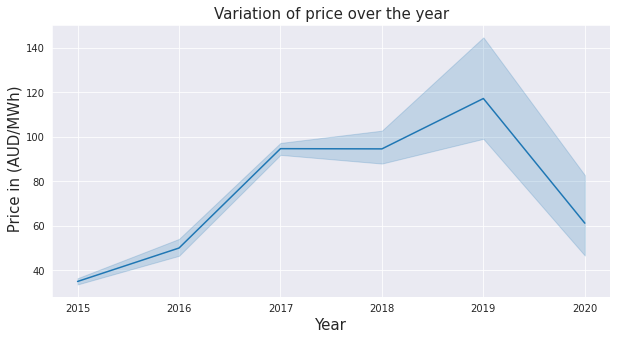

In [124]:
#@title
sns.set_style("darkgrid")
plt.figure(figsize=(10, 5))
g=sns.lineplot(data=df, x='Year', y='RRP')
g.set_ylabel(' Price in (AUD/MWh)', fontsize=15) #Recommended retail prince in Australian dollars per Megawatthour
g.set_title('Variation of price over the year', fontsize=15)
g.set_xlabel('Year', fontsize=15)
plt.show()

Visualizing the avarage price for each year, shows a huge spike in January 2019 and 2020.  

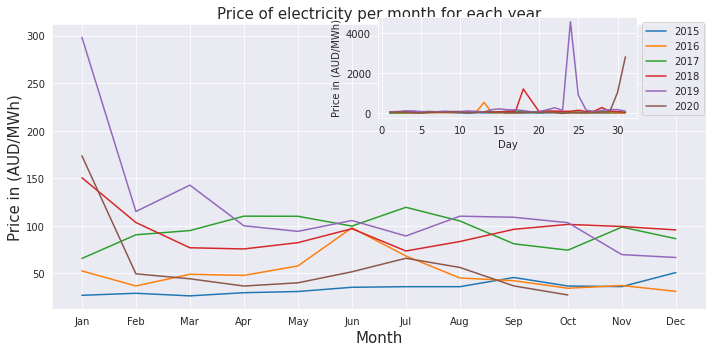

In [125]:
#@title
fig, ax1 = plt.subplots(figsize=(10,5))
# ------------bigger plot
Average_monthly_demand = df.groupby(['Month', 'Year'])['RRP'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
p1=sns.lineplot(data=df, x='Month', y='RRP', hue='Year', palette=colors, ci=None, 
                legend=False)
p1.set_xticks(range(1, 13)) 
p1.set_xlabel("Month", fontsize=15)
p1.set_ylabel("Price in (AUD/MWh)", fontsize=15)
p1.set_title('Price of electricity per month for each year', fontsize=15)
p1.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()

# -------------Inner plot ------
df_inner=df.loc[df['Month']==1]
l, b, h, w = 0.53, 0.66, .28, .36 #< setting for inset
ax2 = fig.add_axes([l, b, w, h])
Average_monthly_demand = df_inner.groupby(['Day', 'Year'])['RRP'].mean().reset_index()
color = sns.color_palette("tab10", n_colors=6)
p2=sns.lineplot(data=df_inner, x='Day', y='RRP', hue='Year', palette=color, ci=None)
p2.set_xlabel("Day", fontsize=10)
p2.set_ylabel("Price in (AUD/MWh)", fontsize=10)

p2.legend(bbox_to_anchor= (1,1))
plt.show()

According to Australia Energy Regulator [report](https://www.aer.gov.au/communication/aer-reports-on-high-wholesale-electricity-prices-in-victoria-and-south-australia-on-24-and-25-january-2019#:~:text=On%20Friday%2025%20January%202019,%24300%2FMWh%20in%20both%20regions.), on the 24th of January, 2019, the people of Australia experienced high temperature reaching 41ºC in Melbourne and 48ºC (a new record) in Adelaide, which led to high demand for electricity. Demand for electricity is usually high on hot days, especially in the late afternoon when air conditioner usage reaches its peak. Several generator outages (planned and unplanned) significantly reduced available low priced local electricity supply in Victoria which led to high prices as shown in the chart above.

Since these are rare events leading to outliers in our datasets, we decided to exclude them from the dataset. As shown in the distribution plot, on a normal day, the electricity prices ranges from negative(when the utility is paying consumer for electrity consumption) to 175AUD/MWh. 

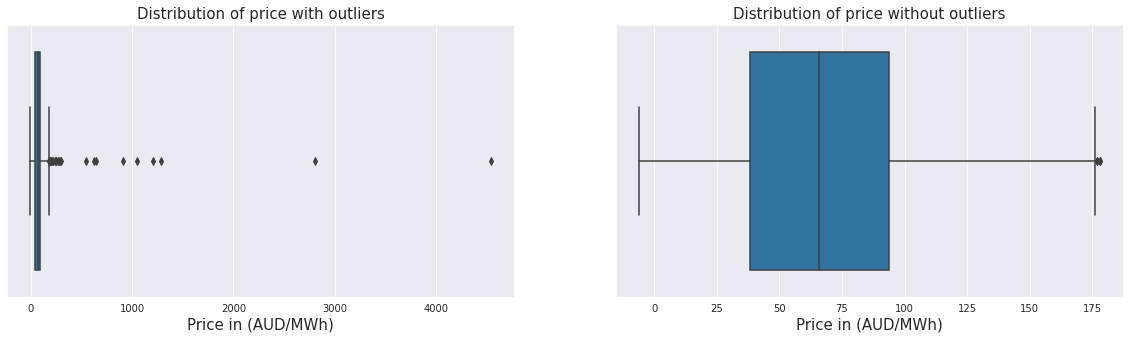

In [126]:
#@title
#Visualizing the price distribution 
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.boxplot(x=df["RRP"])
g.set_title('Distribution of price with outliers', fontsize=15)
g.set_xlabel(r"Price in (AUD/MWh)",fontsize=15)
df_1=df.copy()

#Setting the quantile range
Q1 = df_1['RRP'].quantile(0.25)
Q3 = df_1['RRP'].quantile(0.75)
IQR = Q3 - Q1 

#Roming the outliers
df_1 = df_1[(df_1['RRP'] > (Q1 - 1.5 * IQR)) & (df_1['RRP'] < (Q3 + 1.5 * IQR))]
plt.subplot(1,2,2)
g1=sns.boxplot(x=df_1["RRP"])
g1.set_xlabel("Price in (AUD/MWh)",fontsize=15)
g1.set_title('Distribution of price without outliers', fontsize=15);

From the boxplots above, outliers greatly affected our overview of the distribution making it look like prices were very low(left skewed). By removing the outliers, we see a more even distribution.

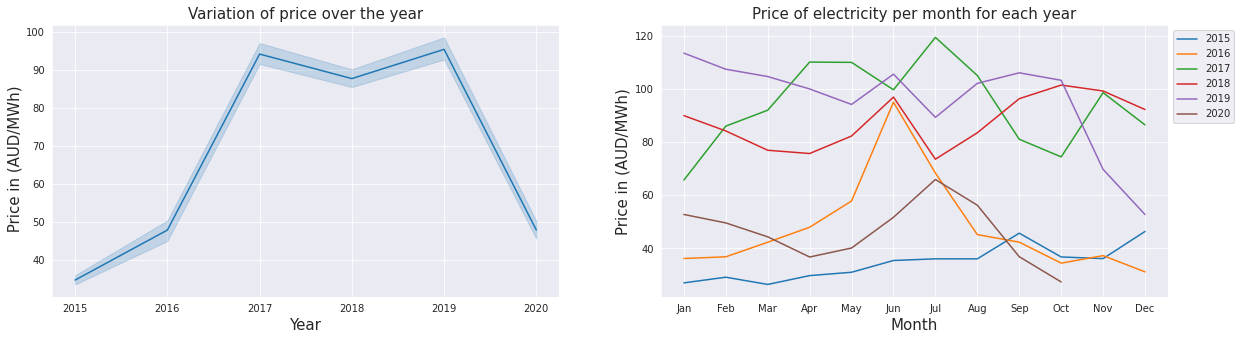

In [127]:
#@title
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.lineplot(data=df_1, x='Year', y='RRP')
g.set_ylabel(' Price in (AUD/MWh)', fontsize=15) 
g.set_title('Variation of price over the year', fontsize=15)
g.set_xlabel('Year', fontsize=15)



plt.subplot(1,2,2)
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['RRP'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Month', y='RRP', hue='Year', palette=colors, ci=None)
g.set_xticks(range(1, 13)) 
g.set_title('Price of electricity per month for each year', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.set_ylabel("Price in (AUD/MWh)",fontsize=15)
g.set_xlabel("Month",fontsize=15)
g.legend(bbox_to_anchor= (1.,1))
plt.show()

The yearly trend in the absense of outliers shows increasing price of electricity from 2015 till 2017, followed by a slight decrease in 2018. The price of electricity falled rapidly from 2019 to 2020.

In the monthly trend, we can observe that each year has it time(s) of sudden spike in electricity price for example June, 2016, 2018 and 2019 which is a winter period, July 2017, which is also a winter period and January 2019 which is summer.



**(c). Variation of electricity price at positive and negative price.**

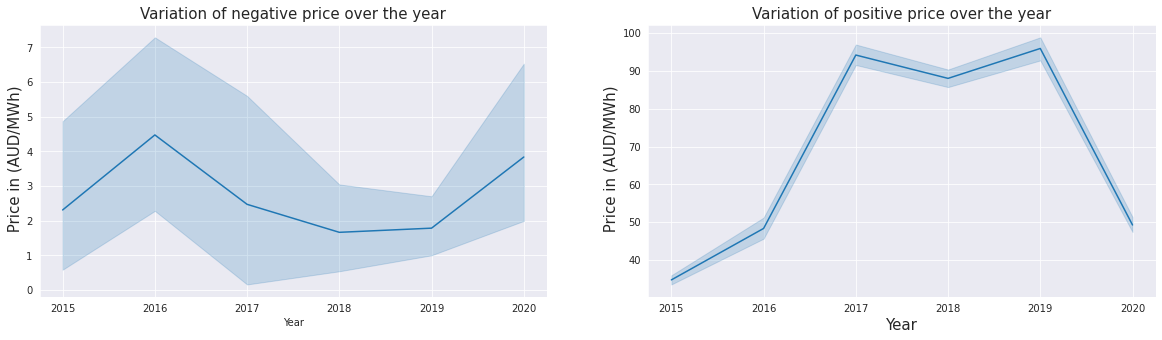

In [128]:
df_1['RRP_negative_1']=df_1['RRP_negative']*-1
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.lineplot(data=df_1, x='Year', y='RRP_negative_1')
g.set_ylabel(' Price in (AUD/MWh)', fontsize=15)
g.set_title('Variation of negative price over the year', fontsize=15)

plt.subplot(1,2,2)
g=sns.lineplot(data=df_1, x='Year', y='RRP_positive')
g.set_ylabel(' Price in (AUD/MWh)', fontsize=15) 
g.set_title('Variation of positive price over the year', fontsize=15)
g.set_xlabel('Year',fontsize=15)
plt.show()

While the trend of the postive price follows the usual recommended retail pricing system, the negative price differs. The plot of the negative price shows that the average amount is quite low with the maximum amount being about 4.5AUD/MWh which is in 2016. The average negative price was also a bit high in 2020 where it was about 3.8AUD/MWh. In 2015, 2017, 2018 and 2019, the average negative pricing was very low (between 1.8 to 2.2 AUD/MWh). 

On the contrary, the positibe pricing has its highest price in 2017, 2018 and 2019 with an average price of about 94AUD/MWh.

The next pair figure give us a deeper look at the prices variation (both at negative and positive) through the months for each year.

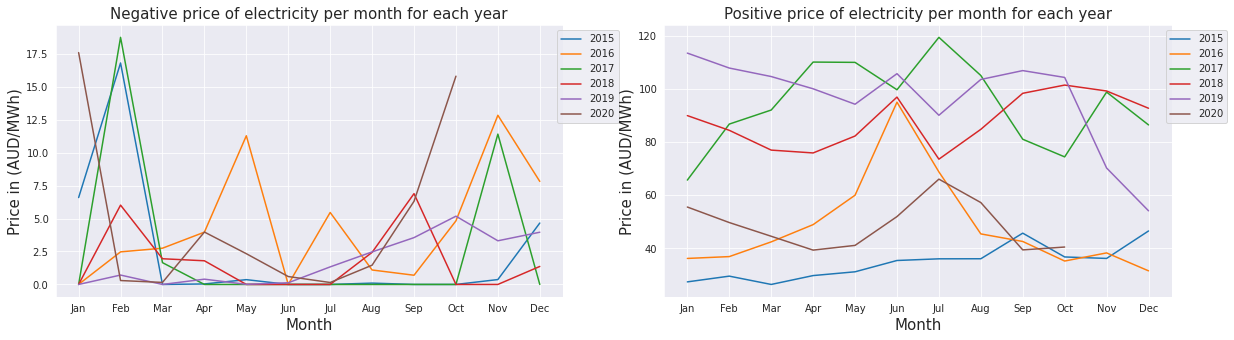

In [129]:
#@title
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
df_1['RRP_negative_1']=df_1['RRP_negative']*-1
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['RRP_negative_1'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Month', y='RRP_negative_1', hue='Year', palette=colors, ci=None)
g.set_xticks(range(1, 13)) 
g.set_title('Negative price of electricity per month for each year', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.set_ylabel("Price in (AUD/MWh)",fontsize=15)
g.set_xlabel("Month",fontsize=15)
g.legend(bbox_to_anchor= (1.12,1))


plt.subplot(1,2,2)
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['RRP_positive'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Month', y='RRP_positive', hue='Year', palette=colors, ci=None)
g.set_xticks(range(1, 13)) 
g.set_title('Positive price of electricity per month for each year', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.set_ylabel("Price in (AUD/MWh)",fontsize=15)
g.set_xlabel("Month",fontsize=15)
g.legend(bbox_to_anchor= (1.12,1))
plt.show()

The monthly trend of the negative price is a bit scattered but carefully tracing the years shows that on the feburary of 2015 and 2017, the negative price spike up to about 18AUD/MWh. May, July and November of 2016 shows an increase in negative price as well. High negative price in 2020 was observed in January and October only. But most of the time, the negative price was zero.

The monthly trend of the positive price closely follows that the the regular recommended price explained above.

**(b). Variation of the electricity demand over the year**

While the price of electricity appears to be increasing over the year from 2015 to 2019, the electricity demand has reduced over the years. In 2020, there appear to be low electricity demand.

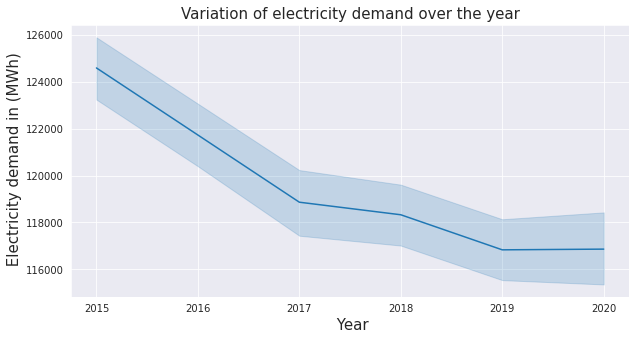

In [130]:
#@title
plt.figure(figsize=(10, 5))
g=sns.lineplot(data=df_1, x='Year', y='demand');
g.set_ylabel(' Electricity demand in (MWh)', fontsize=15) 
g.set_xlabel(' Year', fontsize=15)
g.set_title('Variation of electricity demand over the year', fontsize=15);

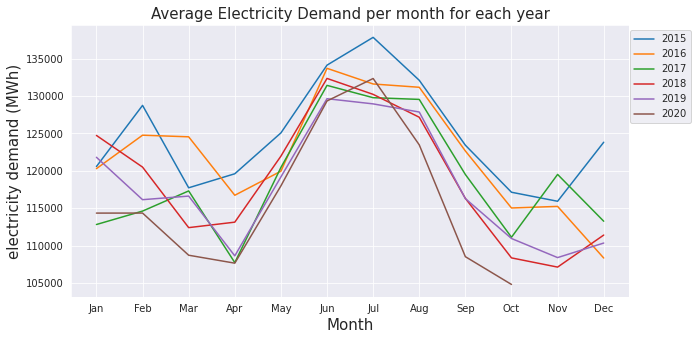

In [131]:
#@title
plt.figure(figsize=(10, 5))
Average_monthly_demand = df.groupby(['Month', 'Year'])['demand'].mean().reset_index()
colors=color = sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df, x='Month', y='demand', hue='Year', palette=colors, ci=None)
g.set_xticks(range(1, 13)) 
g.set_title('Average Electricity Demand per month for each year', fontsize=15)
g.set_xlabel('Month', fontsize=15)
g.set_ylabel('electricity demand (MWh)', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.legend(bbox_to_anchor= (1.12,1))
plt.show()

Taking a closer look at the monthly demand per year, from 2015 to 2020, we observed a high demand for electricity between June and August in every year of our sample. 
To investigate further, we take a look at the weather conditions in the dataset. How does the weather condition influence the variation of electricity price and demand?

But before then, lets look at the demand at negative and positive price.

**(d). Variation of electricity demand at negative and positive price.**

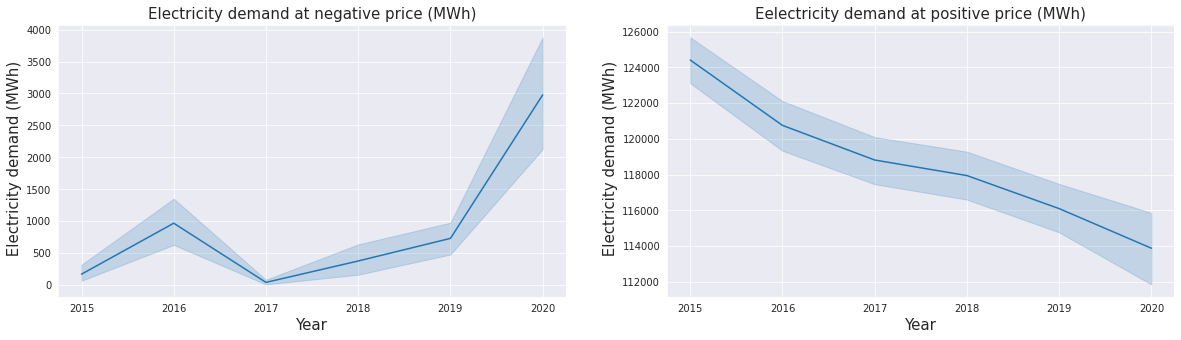

In [132]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.lineplot(data=df_1, x='Year', y='demand_neg_RRP')
g.set_ylabel(' Electricity demand (MWh)', fontsize=15) 
g.set_title('Electricity demand at negative price (MWh)', fontsize=15)
g.set_xlabel('Year', fontsize=15)


plt.subplot(1,2,2)
g=sns.lineplot(data=df_1, x='Year', y='demand_pos_RRP')
g.set_ylabel(' Electricity demand (MWh)', fontsize=15) 
g.set_title('Eelectricity demand at positive price (MWh)', fontsize=15)
g.set_xlabel('Year', fontsize=15)
plt.show()

The demand at negative price has its lowest average in 2015, an incease and a fall in 2016 and 2017 respectively After which it increased up on till 2020.

On the other hand, the average demand at negative price falls steadily from 2015 to 2020.

No we can taking a closer look at the monthly variations of both demands. 

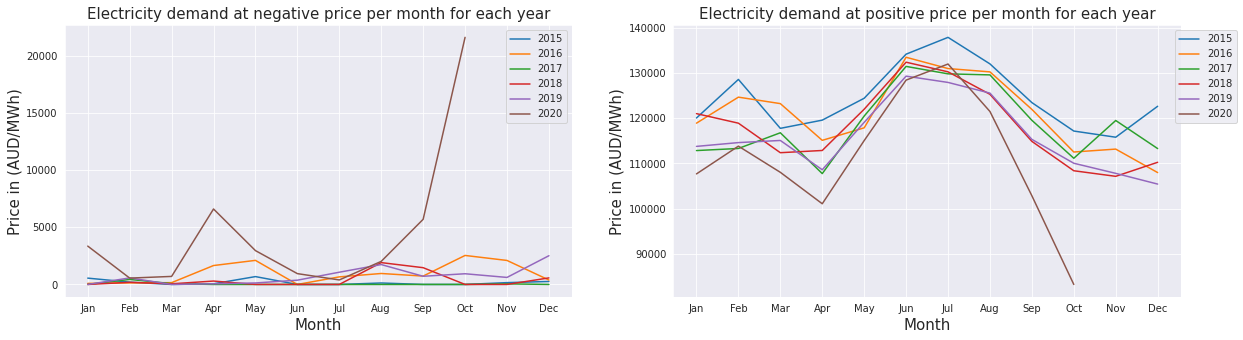

In [133]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['demand_neg_RRP'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Month', y='demand_neg_RRP', hue='Year', palette=colors, ci=None)
g.set_xticks(range(1, 13)) 
g.set_title('Electricity demand at negative price per month for each year', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.set_ylabel("Price in (AUD/MWh)",fontsize=15)
g.set_xlabel("Month",fontsize=15)
g.legend(bbox_to_anchor= (1.,1))


plt.subplot(1,2,2)
df_1['RRP_negative_1']=df_1['RRP_negative']*-1
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['demand_pos_RRP'].mean().reset_index()
colors= sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Month', y='demand_pos_RRP', hue='Year', palette=colors, ci=None)
g.set_xticks(range(1, 13)) 
g.set_title('Electricity demand at positive price per month for each year', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.set_ylabel("Price in (AUD/MWh)",fontsize=15)
g.set_xlabel("Month",fontsize=15)
g.legend(bbox_to_anchor= (1.12,1))
plt.show()

The demand at negative price as shown in the above plot is at its highest on the october of 2020. followed by April 2020. While the variation of demand through the months of the remaining years (2015 to 2019) was quite low.

Comparing the demand at positive price to that at negative price, we observed that at the two periods (April and October 2020), where we observed a highest demand at negative price, the demand at positive price was at its lowest. While the variation of demand through the months of the remaining years (2015 to 2019) was quite high and follows the trend of the regular demand record.

We further proceed to investigate the seasonal variation of electricity price and demand.

**(e). Seasonal variation of energy demand and price.**

__Weather factors:__ `Maximum and minimum temperature`

While the minimum temperature is normally distributed, the maximum temperature is a bit skewed to the right. It shows very rare cases of high temperatures above 40 degree celcius.

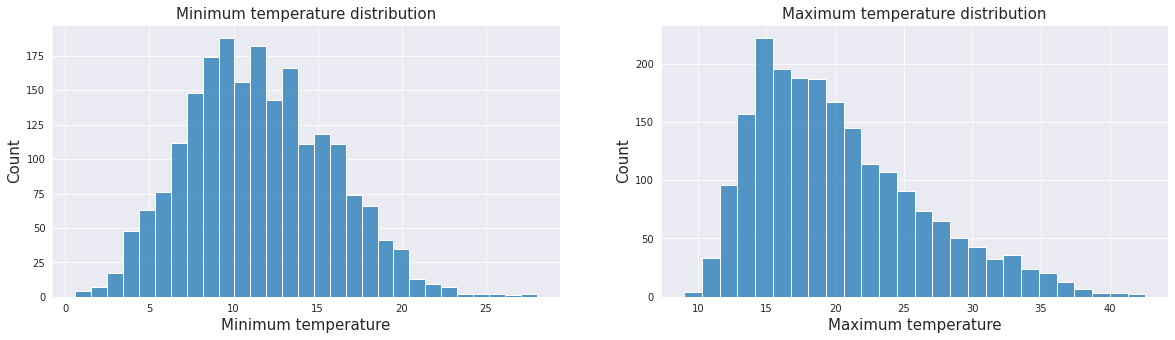

In [134]:
#@title
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
gl1=sns.histplot(x=df_1['min_temperature'])
gl1.set_title('Minimum temperature distribution', fontsize=15)
gl1.set_xlabel('Minimum temperature', fontsize=15)
gl1.set_ylabel('Count', fontsize=15)

plt.subplot(1,2,2)
gl2=sns.histplot(x=df_1['max_temperature']);
gl2.set_title('Maximum temperature distribution', fontsize=15)
gl2.set_xlabel('Maximum temperature', fontsize=15)
gl2.set_ylabel('Count', fontsize=15)
plt.show()


Taking a closer look at the monthly average temperature variation. per year (2015 to 2020), we observed a uniform trend in the temperature variation each year.  

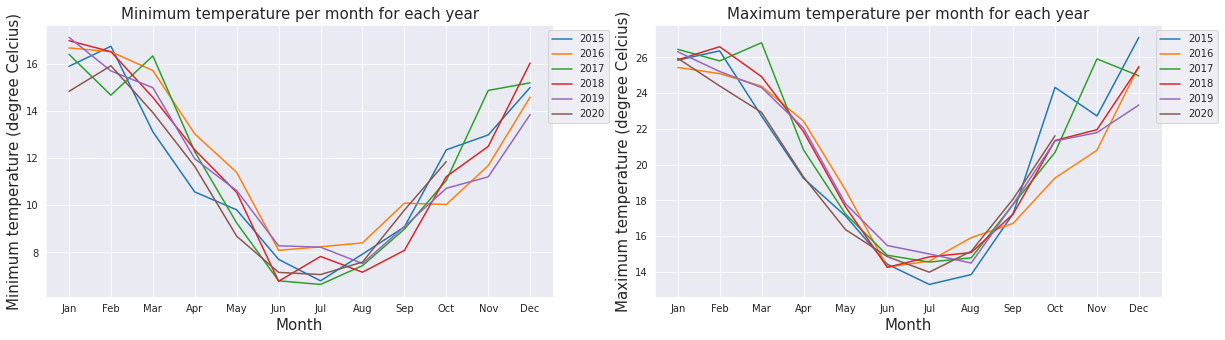

In [135]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['min_temperature'].mean().reset_index()
colors=sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Month', y='min_temperature', hue='Year', palette=colors, ci=None)
g.set_xticks(range(1, 13)) 
g.set_title('Minimum temperature per month for each year', fontsize=15)
g.set_ylabel('Minimum temperature (degree Celcius)', fontsize=15)
g.set_xlabel('Month', fontsize=15)
g.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g.legend(bbox_to_anchor= (1.12,1))



plt.subplot(1,2,2)
Average_monthly_demand = df_1.groupby(['Month', 'Year'])['max_temperature'].mean().reset_index()
colors=sns.color_palette("tab10", n_colors=6)
g3=sns.lineplot(data=df_1, x='Month', y='max_temperature', hue='Year', palette=colors, ci=None)
g3.set_xticks(range(1, 13)) 
g3.set_title('Maximum temperature per month for each year', fontsize=15)
g3.set_ylabel('Maximum temperature (degree Celcius)', fontsize=15)
g3.set_xlabel('Month', fontsize=15)
g3.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
g3.legend(bbox_to_anchor= (1.12,1))
plt.show()

From December to Feburary is characterized with high temperature (Summer period), While there is temperature decrease from March to May. June to August is characterized with low temperature which starts increasing from september till december. 

With this we can classify the seasonal variation into ([WEATHER IN AUSTRALIA](https://www.australia.com/en/facts-and-planning/weather-in-australia.html#:~:text=Australia's%20seasons%20are%20at%20opposite,rainfall%20in%20Australia's%20capital%20cities.)):

| Season | Month    |
|------|------|
|```Summer```  | December - Feburary|
|```Autum```  | March - May|
|```Winter```  | June - August|
|```Spring```  | September - November|



In [136]:
#Defining the seasons
def season(month):
  season_month = {
            12:'Summer', 1:'Summer', 2:'Summer',
            3:'Autumn', 4:'Autumn', 5:'Autumn',
            6:'Winter', 7:'Winter', 8:'Winter',
            9:'Spring', 10:'Spring', 11:'Spring'}
  return season_month.get(month)

season_list = []
for month in df_1['Month']:
  seasons = season(month)
  season_list.append(seasons)
    
df_1['Season'] = season_list

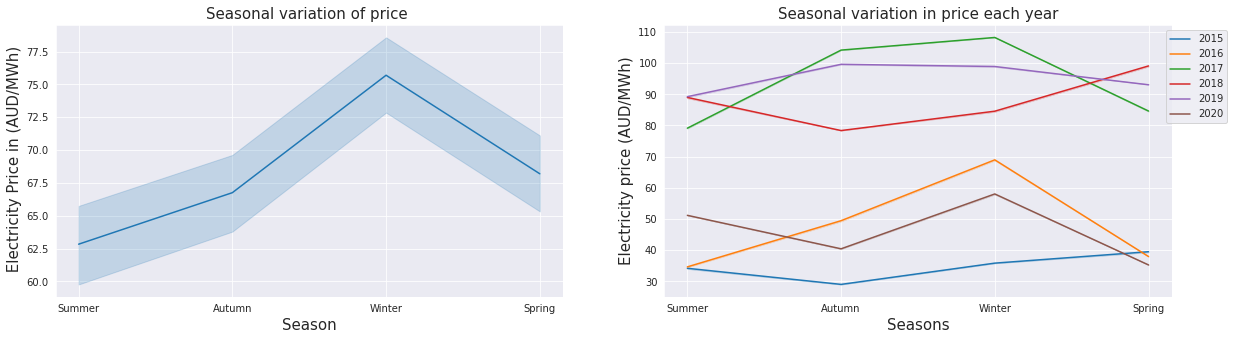

In [137]:

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.lineplot(data=df_1, x='Season', y='RRP')
g.set_ylabel(' Electricity Price in (AUD/MWh)', fontsize=15) 
g.set_title('Seasonal variation of price ', fontsize=15)
g.set_xlabel('Season', fontsize=15)




plt.subplot(1,2,2)
colors=sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Season', y='RRP', hue='Year',palette=colors, ci=False)
g.legend(bbox_to_anchor= (1.12,1))
g.set_xlabel('Seasons', fontsize=15)
g.set_ylabel('Electricity price (AUD/MWh)', fontsize=15)
g.set_title('Seasonal variation in price each year', fontsize=15)
plt.show()

Generally, the electricity price appears to increase from summer through Autum till the winter period where we have the highest price increase. After which it decreases through spring to summer. 
Electricity price was lower in 2015, 2016 and 2020 (between the range of 30 to 70 AUD/MWh), while the price shoot high in 2017, 2018 and 2019 in the range of (80 to 100AUD/MWH)

On yearly basis, 2016, 2017 and 2020, the citizen experience high price of electricity during the winter season. How ever, in 2015 and 2018, the electricity price was highest from spring to summer. Meanwhile, the trend shows a high electricity price in the autum  of 2019.

Next we look at the variation of the demand.

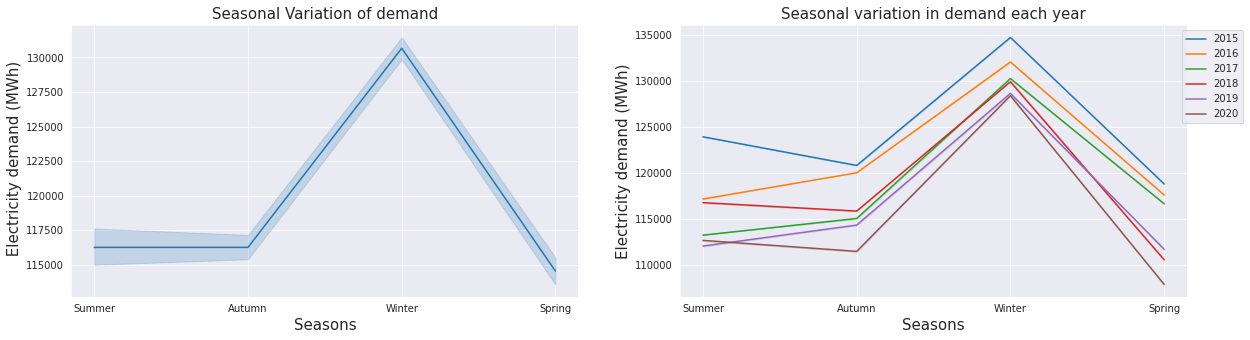

In [138]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.lineplot(data=df_1, x='Season', y='demand')
g.set_ylabel(' Electricity demand (MWh)', fontsize=15) 
g.set_title('Seasonal Variation of demand', fontsize=15)
g.set_xlabel('Seasons', fontsize=15)




plt.subplot(1,2,2)
colors=sns.color_palette("tab10", n_colors=6)
g=sns.lineplot(data=df_1, x='Season', y='demand', hue='Year',palette=colors, ci=False)
g.legend(bbox_to_anchor= (1.12,1))
g.set_xlabel('Seasons', fontsize=15)
g.set_ylabel('Electricity demand (MWh)', fontsize=15)
g.set_title('Seasonal variation in demand each year', fontsize=15)
plt.show()

From the graph, the energy demand is generally high in the winter season. This can be associated with the wide use of heating systems during the winter. 
Over the years, the demand appears to follow the same trend with demand being highest in winter. Although we can also observe cases of slightly high demand in the summers of 2015, 2016 and 2018.


**(d). Does School days and Holidays influenc energy demand and price?.**


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


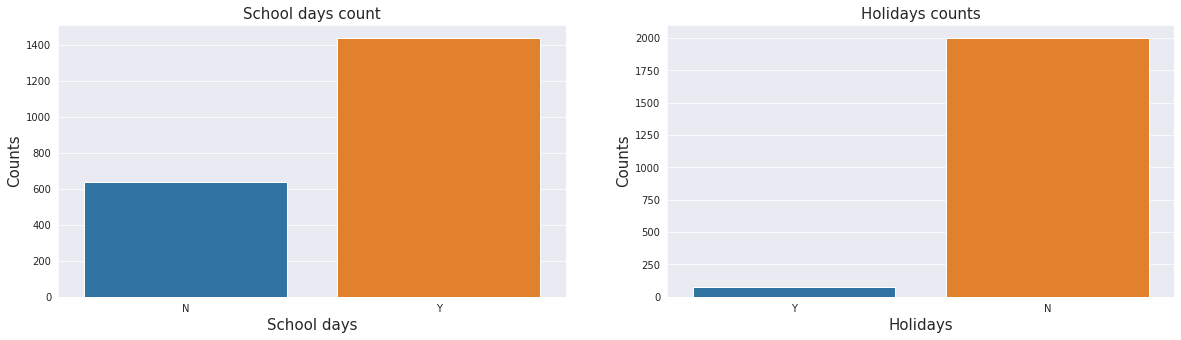

In [139]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g1=sns.countplot(df_1.school_day)
g1.set_title('School days count', fontsize=15)
g1.set_xlabel('School days', fontsize=15)
g1.set_ylabel('Counts', fontsize=15)

plt.subplot(1,2,2)
g2=sns.countplot(df_1.holiday)
g2.set_title('Holidays counts', fontsize=15)
g2.set_xlabel('Holidays', fontsize=15)
g2.set_ylabel('Counts', fontsize=15)
plt.show()

The plot shows the counts of schooldays and holidays. It quite normal for the number of holidays over the years to be small compared to the numbers of days which are not holiday. 

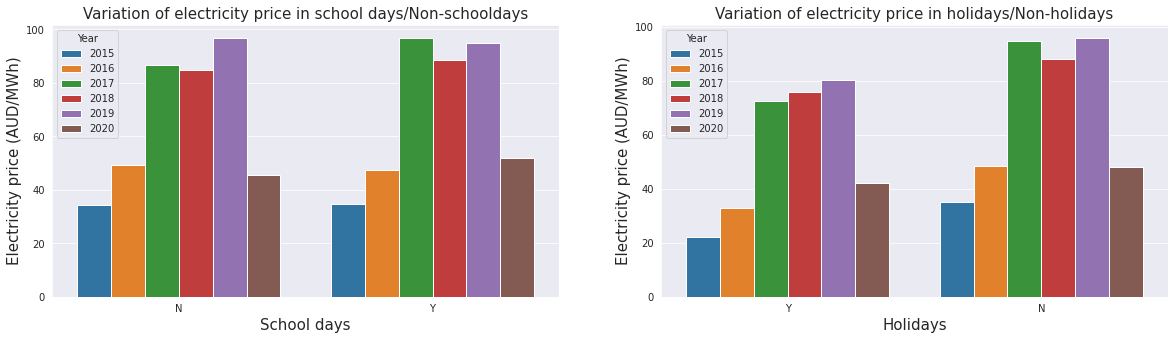

In [140]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g1=sns.barplot(data=df_1, x='school_day', y='RRP', hue='Year', ci=False)
g1.set_title('Variation of electricity price in school days/Non-schooldays', fontsize=15)
g1.set_xlabel('School days', fontsize=15)
g1.set_ylabel('Electricity price (AUD/MWh)', fontsize=15)

plt.subplot(1,2,2)
g2=sns.barplot(data=df_1, x='holiday', y='RRP', hue='Year', ci=False)
g2.set_title('Variation of electricity price in holidays/Non-holidays', fontsize=15)
g2.set_xlabel('Holidays', fontsize=15)
g2.set_ylabel('Electricity price (AUD/MWh)', fontsize=15)
plt.show()

We plotted to see if there is any trend in electricity price during schooldays or holidays. Our analysis shows no particular trend.

#### (e). Corrrelation check!

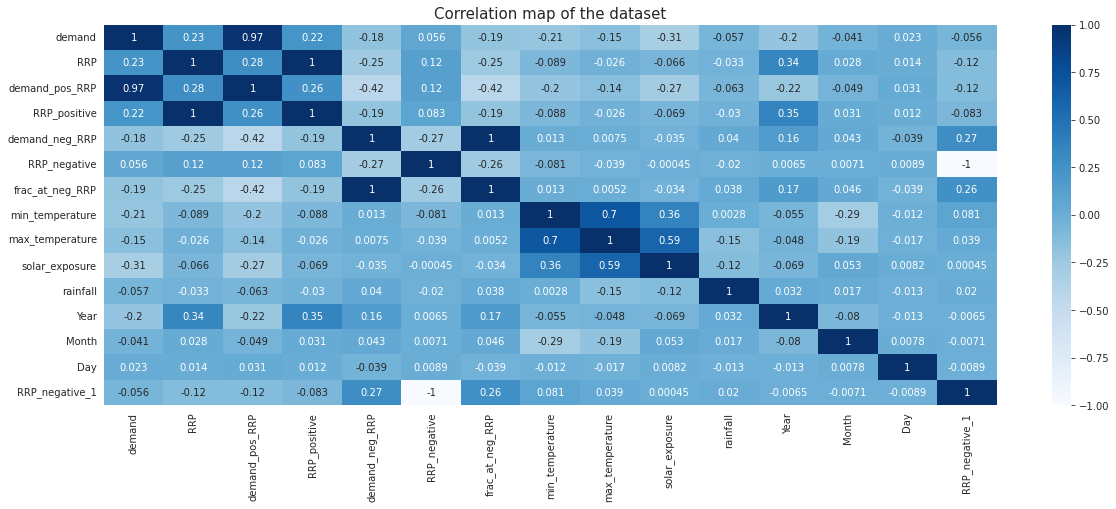

In [141]:
corr = df_1.corr()
plt.figure(figsize=(20,7))
g=sns.heatmap(corr,cmap="Blues", annot=True)
g.set_title('Correlation map of the dataset', fontsize=15)
plt.show()

From the correlation plot, we observed a good positive correlation between the demand related features and the price. While other features shows weak or very weak correlation with the price.

The correlation between Maximum temperature and demand is  -0.15371533226807518
The correlation between Minimum temperature and demand is  -0.2079886722749854


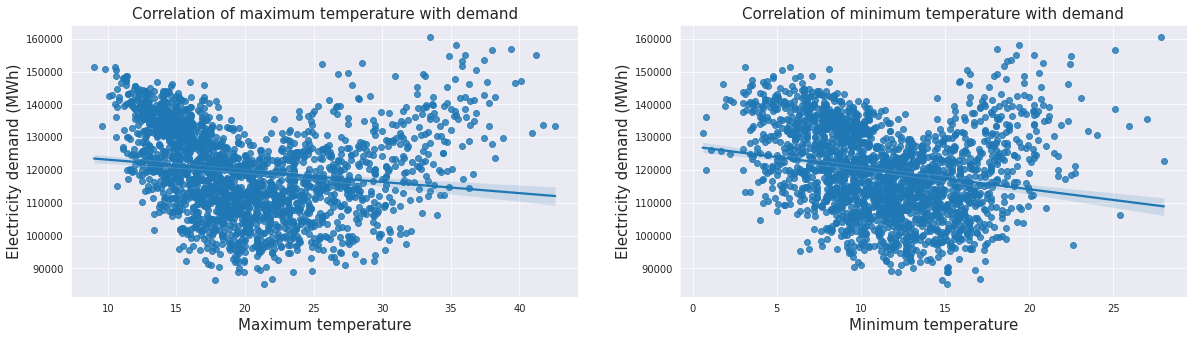

In [142]:
corr1=df_1['demand'].corr(df_1['min_temperature'])
corr2=df_1['demand'].corr(df_1['max_temperature'])
print(f'The correlation between Maximum temperature and demand is ', corr2)
print(f'The correlation between Minimum temperature and demand is ', corr1)
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.regplot(data=df_1, x='max_temperature', y='demand')
g.set_xlabel('Maximum temperature', fontsize=15)
g.set_ylabel('Electricity demand (MWh)', fontsize=15)
g.set_title('Correlation of maximum temperature with demand', fontsize=15)


plt.subplot(1,2,2)
g=sns.regplot(data=df_1, x='min_temperature', y='demand')
g.set_xlabel('Minimum temperature', fontsize=15)
g.set_ylabel('Electricity demand (MWh)', fontsize=15)
g.set_title('Correlation of minimum temperature with demand', fontsize=15)
plt.show()


The correlation between Maximum temperature and Price is  -0.02597523750797453
The correlation between Minimum temperature and Price is  -0.08866096739530215


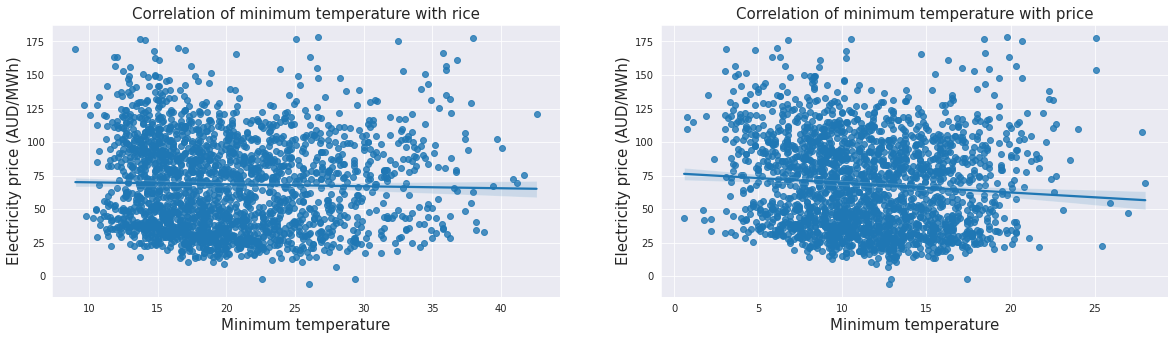

In [143]:
corr1=df_1['RRP'].corr(df_1['min_temperature'])
corr2=df_1['RRP'].corr(df_1['max_temperature'])
print(f'The correlation between Maximum temperature and Price is ', corr2)
print(f'The correlation between Minimum temperature and Price is ', corr1)
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
g=sns.regplot(data=df_1, x='max_temperature', y='RRP')
g.set_xlabel('Minimum temperature', fontsize=15)
g.set_ylabel('Electricity price (AUD/MWh)', fontsize=15)
g.set_title('Correlation of minimum temperature with rice', fontsize=15)


plt.subplot(1,2,2)
g=sns.regplot(data=df_1, x='min_temperature', y='RRP')
g.set_xlabel('Minimum temperature', fontsize=15)
g.set_ylabel('Electricity price (AUD/MWh)', fontsize=15)
g.set_title('Correlation of minimum temperature with price', fontsize=15)

plt.show()



We next proceed with the daily price forcasting starting with the Data preprocessing.

<a name="preps"></a>
# **4. Data Preprocessing**

In the analysis, we make use of two approaches:
>1. Making use of just the features contained in the dataset particularly, the demand, price, weather variables and the holidays and school days.

> 2. Our second approach involved some feature engineering where we calculated the rolling mean  of the price for the prediction.

---
<a name="scale"></a>
 ### - 4.1 Data scaling
 In this section we will scale the numerial part of the dataset using the MinMaxScaler. 

Starting with the features with no rolling mean

In [144]:
#Make a copy of the dataset
#
norm_scale=MinMaxScaler()
df_scaled=norm_scale.fit_transform(df_1[['RRP','demand','demand_pos_RRP', 'demand_neg_RRP', 'min_temperature',
                                         'max_temperature', 'solar_exposure', 'rainfall']])
df_scaled=pd.DataFrame(df_scaled, columns=['RRP','demand','demand_pos_RRP', 'demand_neg_RRP', 'min_temperature',
                                           'max_temperature', 'solar_exposure', 'rainfall'])

In [145]:
#Bringing in the date, holiday and schooldays features into the scaled dataframe
df_scaled['date']=df_1['date']
df_scaled['holiday']=df_1['holiday']
df_scaled['school_day']=df_1['school_day']

In [146]:
#Encode the cathegorical variables Schooldays and holidays using OneHotEncoder
df_scaled=pd.get_dummies(df_scaled)

In [147]:
#Checking the shape of the dataset
df_scaled.shape

(2078, 13)

In [148]:
#Drop all null values 
df_ready=df_scaled.dropna()

In [149]:
#Checking the new shape of the dataset
df_ready.date.shape

(2050,)

---
<a name="split"></a>
 ### - 4.2 Data splitting
 In this section we will split the data using. 4 years  (2015 to 2018) of data for training and the 2years (2019 and 2020) for testing. 

In [150]:
#Training dataset
df_train = df_ready[df_ready.date<='2019-01-01']
#Test dataset
df_test =  df_ready[df_ready.date>'2019-01-01']
#A reserved copy of the test dataset for plotting
df_resid = df_ready[df_ready.date>'2019-01-01']

#Extract the target feature for training and testing
y_train=df_train["RRP"]
y_test=df_test["RRP"]

#Extracting the independent features for training and testing
X_train =df_train.drop(labels=['RRP', 'date'], axis=1)
X_test=df_test.drop(labels=['RRP', 'date'], axis=1)
df_train.shape

(1451, 13)

In [151]:
#Checking to make sure the shapes of the datasets are consistent

print(f'X_train:', len(X_train))
print(f'y_train:', len(y_train))
print(f'X_test:', len(X_test))
print(f'y_tets:', len(y_test))


X_train: 1451
y_train: 1451
X_test: 599
y_tets: 599


<a name="mode"></a>
# **5. Machine Learning Model**
   - 5.1 [model training](#train)
   - 5.2 [model testing](#test)
   - 5.3 [model validation](#valid)

<a name="train"></a>
### - 5.1 Model training

In [152]:
#Ininitialize the Linear model
reg=LinearRegression()
reg.fit(X_train, y_train)
ypred=reg.predict(X_test)

len(ypred)

599

In [153]:
df_resid['y_pred1']=ypred
df_resid=df_resid.set_index('date')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


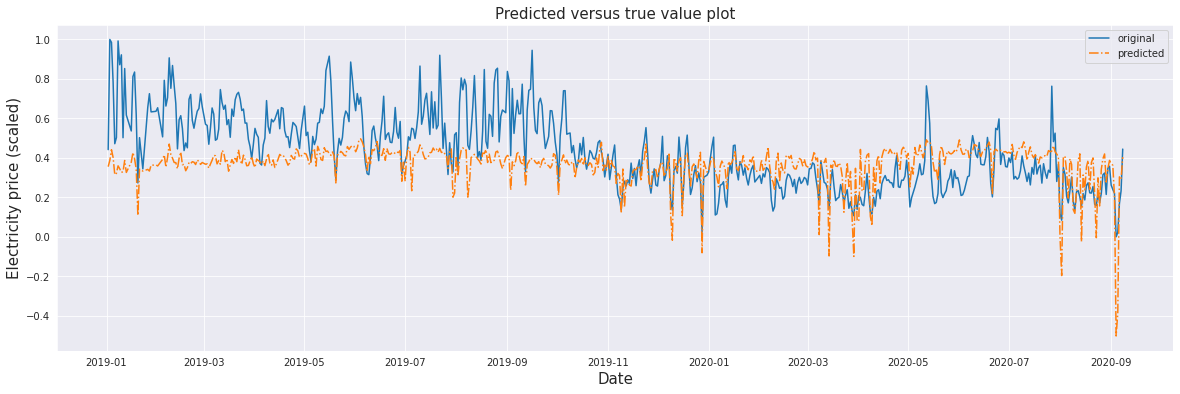

In [154]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df_resid, x='date', y='RRP', label="original")
sns.lineplot(data=df_resid, x='date', y="y_pred1", linestyle= 'dashdot', label="predicted")
plt.title("Predicted versus true value plot", fontsize=15)
plt.ylabel('Electricity price (scaled)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.legend()
plt.show()

<a name="test"></a>
#### - 5.2 Model testing

For the model evaluation, we used 3 metrics for evaluation which are the root mean square error, mean squared error and the mean absolute error.

In [155]:
#Mean squared error
mse = mean_squared_error(y_test, ypred)
print("MSE:",  mse)
#Mean absolute error
MAE=mae(y_test, ypred)

#Root mean squared error
rmse = np.sqrt(mse)

print("RMSE:", rmse)
print("mae:", MAE)

MSE: 0.032663687430800274
RMSE: 0.18073098082730663
mae: 0.14041599594993875


**We next visualize the errors**

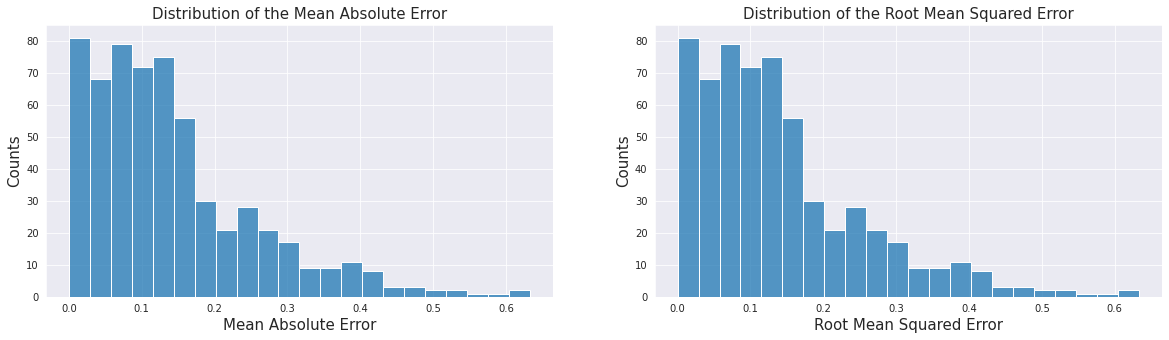

In [156]:
#True value
expected = np.array(y_test)
# predicted value
predicted = ypred
# calculate errors
MAE_errors = list()
MSE_errors=list()
for i in range(len(expected)):
# calculate error
    
    err = abs((expected[i] - predicted[i]))
    err2=(expected[i] - predicted[i])**2
# store error
    MAE_errors.append(err)
    MSE_errors.append(err2)
    
    
#Plotting error distributions
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.histplot(MAE_errors)
plt.xlabel('Mean Absolute Error', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Distribution of the Mean Absolute Error', fontsize=15)

plt.subplot(1,2,2)
sns.histplot(np.sqrt(MSE_errors))
plt.xlabel('Root Mean Squared Error', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Distribution of the Root Mean Squared Error', fontsize=15)
plt.show()

For both error metrics, we observed that the distribution is skewed to the right showing that majority of the prediction errors are at the lower side, while we still observe some high prediction errors of up to 0.6. 

<a name="valid"></a>
### - 5.3 Model validation

**We further used the cross validation technique on our model**

In [157]:
#Using the Time series splits functions 
tscv = TimeSeriesSplit(n_splits = 5)
rmse = []
MAE=[]
MSE=[]
for train_index, test_index in tscv.split(df_ready):
    df_train, df_test = df_ready.iloc[train_index], df_ready.iloc[test_index]
    X_train =df_train.drop(labels=['RRP', 'date'], axis=1)
    X_test=df_test.drop(labels=['RRP', 'date'], axis=1)
    y_train=df_train["RRP"]
    y_test=df_test["RRP"]
    reg=LinearRegression()
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    true_values = y_test.values
    MSE.append(mean_squared_error(true_values, predictions))
    MAE.append(mae(true_values, predictions))
    rmse.append(np.sqrt(mean_squared_error(true_values, predictions)))
    
    
print("RMSE_avrg: {}".format(np.mean(rmse)))
print("MSE_avrg: {}".format(np.mean(MSE)))
print("MAE_avrg: {}".format(np.mean(MAE)))
dict_met={'Split':['1', '2', '3', '4', '5'],'RMSE':rmse, 'MAE':MAE, 'MSE':MSE}
metric=pd.DataFrame(dict_met)
metric=metric.set_index('Split')
metric

RMSE_avrg: 0.21014916256113386
MSE_avrg: 0.04777592027958453
MAE_avrg: 0.1741709326898576


,RMSE,MAE,MSE
Split,,,
1,0.163323,0.102774,0.026674
2,0.297240,0.264542,0.088352
3,0.208460,0.175723,0.043456
4,0.252269,0.218895,0.063639
5,0.129454,0.108922,0.016758


<a name="mode1"></a>
# 6. Improving Model performance
   - 6.1 [Model Preprocessing and training](#train1)
   - 6.2 [Model testing](#test1)
   - 6.3 [Model validation](#valid1)

<a name="train1"></a>
### - 6.1 Model Preprocessing and training

In [158]:
#Make a copy of the dataset
df_2=df_1.copy()
df_2['RRP_shift']=df_2['RRP'].shift(1)
df_2['RRP_moving_avrg']=df_2['RRP'].rolling(10).mean()
norm_scale=MinMaxScaler()
df_eng=norm_scale.fit_transform(df_2[['RRP','RRP_shift','RRP_moving_avrg','demand','demand_pos_RRP', 'demand_neg_RRP', 'min_temperature', 
                                         'max_temperature', 'solar_exposure', 'rainfall']])
df_eng=pd.DataFrame(df_eng, columns=['RRP','RRP_shift','RRP_moving_avrg','demand','demand_pos_RRP', 'demand_neg_RRP', 'min_temperature',
                                           'max_temperature', 'solar_exposure', 'rainfall'])

In [159]:
#Adding datae, holidays and school days to the scaled dataset
df_eng['date']=df_2['date']
df_eng['holiday']=df_2['holiday']
df_eng['school_day']=df_2['school_day']

In [160]:
df_eng=pd.get_dummies(df_eng)
df_eng_ready=df_eng.dropna()
df_eng_ready.shape

(2041, 15)

**Time to split!**

In [161]:
#Geting the traina and test dataset
df_eng_train = df_eng_ready[df_eng_ready.date<='2019-01-01']
df_eng_test =  df_eng_ready[df_eng_ready.date>'2019-01-01']


In [162]:
#Getting the test and train data for the features and the target dataset
y_eng_train=df_eng_train["RRP"]
y_eng_test=df_eng_test["RRP"]
X_eng_train =df_eng_train.drop(labels=['RRP', 'date'], axis=1)
X_eng_test=df_eng_test.drop(labels=['RRP', 'date'], axis=1)

**Model training**

In [163]:
#Initializing the model
reg1=LinearRegression()
#model fitting
reg1.fit(X_eng_train, y_eng_train)
#prediction
ypred2=reg1.predict(X_eng_test)


In [164]:
#Adding the new prediction to the residual dataset
df_resid['y_pred2']=ypred2


**Visualizing the prediction versus the true values**

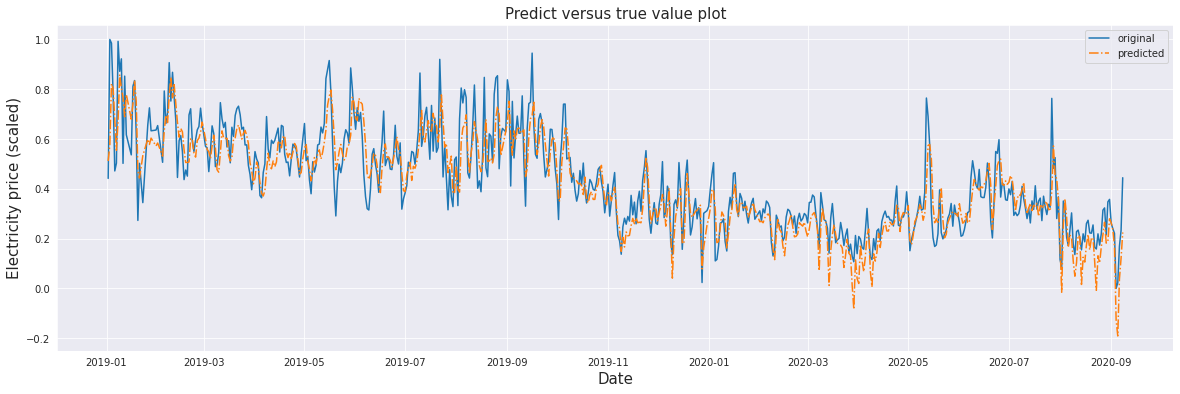

In [165]:
plt.figure(figsize=(20, 6))
sns.lineplot(data=df_resid, x='date', y='RRP', label="original")
sns.lineplot(data=df_resid, x='date', y="y_pred2", linestyle= 'dashdot', label="predicted")
plt.title("Predict versus true value plot", fontsize=15)
plt.ylabel('Electricity price (scaled)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.legend()
plt.show()

<a name="test1"></a>
### - 6.1 Model testing

In [166]:
mse2 = mean_squared_error(y_eng_test, ypred2)
print("MSE:",  mse2)
MAE2=mae(y_eng_test, ypred2)
rmse2 = np.sqrt(mse)

print("RMSE:", rmse2)
print("mae:", MAE2)

MSE: 0.008550972072462509
RMSE: 0.18073098082730663
mae: 0.07020749621803948


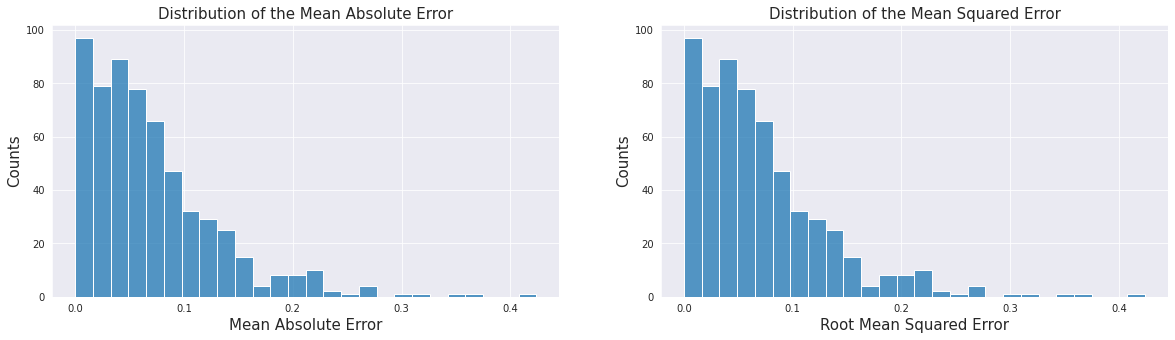

In [167]:
expected = np.array(y_eng_test)
# predicted value
predicted = ypred2

MAE_errors = list()
MSE_errors=list()
for i in range(len(expected)):
# calculate error
    
    err = abs((expected[i] - predicted[i]))
    err2=(expected[i] - predicted[i])**2
# store error
    MAE_errors.append(err)
    MSE_errors.append(err2)
    
    
#Plotting error distributions
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.histplot(MAE_errors)
plt.xlabel('Mean Absolute Error', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Distribution of the Mean Absolute Error', fontsize=15)

plt.subplot(1,2,2)
sns.histplot(np.sqrt(MSE_errors))
plt.xlabel('Root Mean Squared Error', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.title('Distribution of the Mean Squared Error', fontsize=15)
plt.show()

The error plot shows a great improvement in our model. High value errors like 0.6 as observed in the previous approach has been cut-off. More of the error range is between 0 and 0.1. 

In [168]:
tscv = TimeSeriesSplit(n_splits = 5)
rmse2 = []
MAE2=[]
MSE2=[]
for train_index, test_index in tscv.split(df_eng_ready):
    df_train, df_test = df_eng_ready.iloc[train_index], df_eng_ready.iloc[test_index]
    X_train =df_train.drop(labels=['RRP', 'date'], axis=1)
    X_test=df_test.drop(labels=['RRP', 'date'], axis=1)
    y_train=df_train["RRP"]
    y_test=df_test["RRP"]
    reg=LinearRegression()
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    true_values = y_test.values
    MSE2.append(mean_squared_error(true_values, predictions))
    MAE2.append(mae(true_values, predictions))
    rmse2.append(np.sqrt(mean_squared_error(true_values, predictions)))
    
    
print("RMSE_avrg2: {}".format(np.mean(rmse2)))
print("MSE_avrg2: {}".format(np.mean(MSE2)))
print("MAE_avrg2: {}".format(np.mean(MAE2)))
dict_met2={'Split':['1', '2', '3', '4', '5'],'RMSE2':rmse2, 'MAE2':MAE2, 'MSE2':MSE2}
metric2=pd.DataFrame(dict_met2)
metric2=metric2.set_index('Split')
metric2

RMSE_avrg2: 0.09007820823677723
MSE_avrg2: 0.008188007740878632
MAE_avrg2: 0.06691239025823101


,RMSE2,MAE2,MSE2
Split,,,
1,0.091554,0.062805,0.008382
2,0.090509,0.068580,0.008192
3,0.083132,0.061593,0.006911
4,0.104974,0.081248,0.011019
5,0.080222,0.060337,0.006436


In [169]:
dict_met2={'Split':['1', '2', '3', '4', '5'],'RMSE2':rmse2, 'MAE2':MAE2, 'MSE2':MSE2}
metric2=pd.DataFrame(dict_met2)
metric2=metric2.set_index('Split')

<a name="valid1"></a>
### - 6.1 Model Validation 

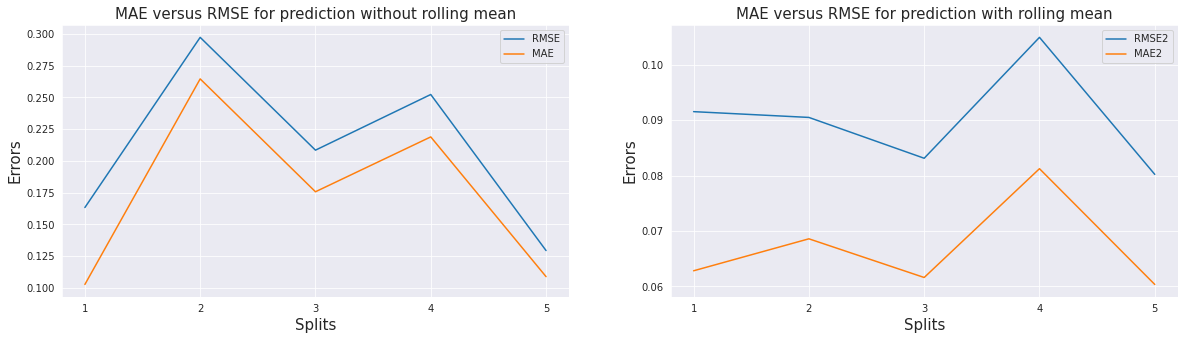

In [170]:
#Plotting the cross validation errors for model without rolling mean
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.lineplot(data=metric, x='Split', y='RMSE', label='RMSE')
sns.lineplot(data=metric, x='Split', y='MAE', label='MAE')
plt.title('MAE versus RMSE for prediction without rolling mean', fontsize=15)
plt.ylabel('Errors', fontsize=15)
plt.xlabel('Splits', fontsize=15)
plt.legend()


#Plotting the cross validation errors for model with rolling mean
plt.subplot(1,2,2)
sns.lineplot(data=metric2, x='Split', y='RMSE2', label='RMSE2')
sns.lineplot(data=metric2, x='Split', y='MAE2', label='MAE2')
plt.legend()
plt.title('MAE versus RMSE for prediction with rolling mean', fontsize=15)
plt.ylabel('Errors', fontsize=15)
plt.xlabel('Splits', fontsize=15)
plt.show()

The first plot shows that the 1st split and the 5th split gives the minimal error compared to the other splits.

The second plot indicates that the 1st, 3rd and 5th splits shows the minimal error.

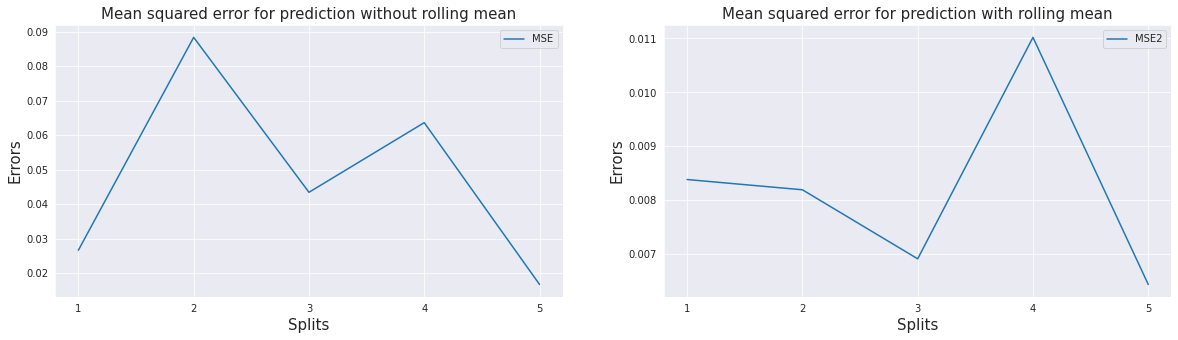

In [171]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.lineplot(data=metric, x='Split', y='MSE', label='MSE')
plt.title('Mean squared error for prediction without rolling mean', fontsize=15)
plt.ylabel('Errors', fontsize=15)
plt.xlabel('Splits', fontsize=15)

plt.subplot(1,2,2)
sns.lineplot(data=metric2, x='Split', y='MSE2', label='MSE2')
plt.title('Mean squared error for prediction with rolling mean', fontsize=15)
plt.ylabel('Errors', fontsize=15)
plt.xlabel('Splits', fontsize=15)
plt.show()

The first plot shows that the 1st split and the 5th split gives the minimal error compared to the other splits.

The second plot shows only 3rd and 5th splits having the minimal error.

<a name="con"></a>
# 7. **Conclusion**

The goal of this work is to apply machine learning algorithm in the prediction of daily energy price in Victoria energy data set. We started by exploring the dataset to understand the variation of electricity price and demand with other features of teh dataset. We observed the seasonal variation of demand and price. Our analysis shows increase in price and demand mainly in the winter periods. 

We further made use of linear regression model to train and make a forcast of the price. Making use of two approaches; the first with out a rolling mean as a feature for the prediction and second approach made use of the first lag and a rolling window of 10 as new feature for the forcasting.

We first approach gave a mean squared error of 0.03266 and a average mean squared error of 0.04778 for the cross validation.

The model performance was significantly improved with the second approach as the mean squared error was reduced to 0.00855 and average mean squared error of 0.00819 for the cross validation.

![](https://media.istockphoto.com/id/1147584034/vector/thank-you-thanks-expressing-gratitude-note-on-a-sign.jpg?s=612x612&w=0&k=20&c=Pw2CDN2dgiYe4_pzh4PaZRyAahZf1u5iJE_xd4jQCao=)